In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math
import sklearn.metrics as sklm
import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge
import sklearn.model_selection as ms
import seaborn as sns
import matplotlib.pyplot as plt

sale_2020 = pd.read_csv("../Week_4_FeatureEngineerning/2020_Sale.csv")


# Fill Null value and filter unknown sales
sale_2020[['Pickup_InStore', 'Pickup_Curbside', 'Local_Delivery']] = sale_2020[
    ['Pickup_InStore', 'Pickup_Curbside', 'Local_Delivery']].fillna(0)

sale_2020.dropna(subset=['2020_sale'], inplace=True)
# print (sale_2017.shape)

C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
cols_input = [
    "Pickup_InStore",
    "Pickup_Curbside",
    "Local_Delivery",
    "POPESTIMATE2020",
    "NPOPCHG2020",
    "BIRTHS2020",
    "DEATHS2020",
    "NATURALINC2020",
    "INTERNATIONALMIG2020",
    "DOMESTICMIG2020",
    "NETMIG2020",
    "RBIRTH2020",
    "RDEATH2020",
    "RNATURALINC2020",
    "RINTERNATIONALMIG2020",
    "RDOMESTICMIG2020",
    "RNETMIG2020",
]

# print (sale_2020[cols_input].isnull().sum())


x_train, x_valid, y_train, y_valid = train_test_split(sale_2020[cols_input],
                                                    sale_2020['2020_sale'],
                                                    test_size=.3,
                                                    random_state=42)
X_train_all = sale_2020[cols_input]

Pickup_InStore           0
Pickup_Curbside          0
Local_Delivery           0
POPESTIMATE2020          0
NPOPCHG2020              0
BIRTHS2020               0
DEATHS2020               0
NATURALINC2020           0
INTERNATIONALMIG2020     0
DOMESTICMIG2020          0
NETMIG2020               0
RBIRTH2020               0
RDEATH2020               0
RNATURALINC2020          0
RINTERNATIONALMIG2020    0
RDOMESTICMIG2020         0
RNETMIG2020              0
dtype: int64


In [4]:
# Scalar the dataset
scaler  = StandardScaler()
scaler.fit(X_train_all)
x_train_tf = scaler.transform(x_train)
x_valid_tf = scaler.transform(x_valid)

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

def print_report(y_actual, y_pred):
    r_squared = r2_score(y_actual, y_pred)
    MAE = mean_absolute_error(y_actual, y_pred)
    MSE = mean_squared_error(y_actual, y_pred)

    print('R^2:%.3f'%r_squared)
    print('MAE:%.3f'%MAE)
    print('MSE:%.3f'%MSE)
    print(' ')
    return r_squared, MAE, MSE

## Random Forest - Feature Importance

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(x_train_tf, y_train)

C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [29]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

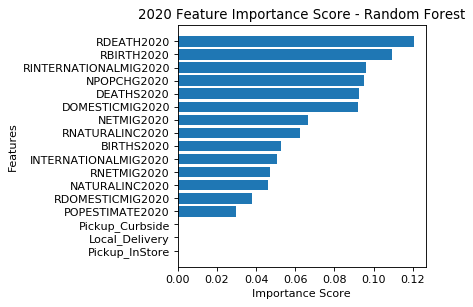

In [31]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(4, 4), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features',)
plt.xlabel('Importance Score')
plt.title('2020 Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(x_train_tf, y_train)

C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [13]:
feature_importances.head()

,importance
RDEATH2020,0.120027
RBIRTH2020,0.115598
INTERNATIONALMIG2020,0.071584
DOMESTICMIG2020,0.036963
NETMIG2020,0.014393


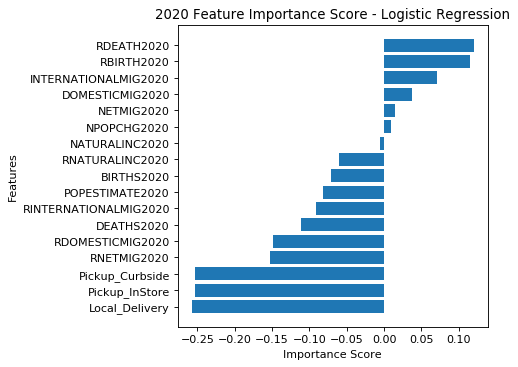

In [27]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('2020 Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()